Dane z 5 największych lig z sezonów 2011 - 2017.
9 074 meczów łącznie i 941 009 eventów

Importy i wczytanie plikow csv

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

events = pd.read_csv("events.csv", sep=",")
matches = pd.read_csv('ginf.csv', sep=',')
events.columns

Index(['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
       'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
       'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
       'location', 'bodypart', 'assist_method', 'situation', 'fast_break'],
      dtype='object')

Ile jest meczy rozegranych w kazdym z krajów?

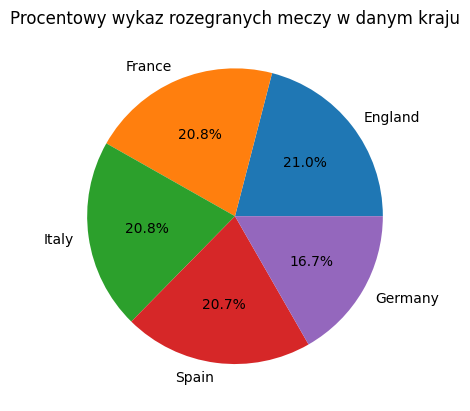

In [6]:
matches_countries = matches['country'].value_counts()
labels = [x.capitalize() for x in matches_countries.keys()]
values = matches_countries.values

plt.pie(values, labels=labels, autopct=lambda pct: '{:.1f}%'.format(pct))
plt.title('Procentowy wykaz rozegranych meczy w danym kraju')
plt.show()

Top 5 strzelców.


In [7]:
events_goals = events.filter(items=['is_goal', 'player'])
events_goals = events_goals[events_goals['is_goal'] == 1]
events_goals['player'].value_counts()

player
lionel messi          205
cristiano ronaldo     198
zlatan ibrahimovic    153
robert lewandowski    124
edinson cavani        121
                     ... 
damir vrancic           1
franck signorino        1
roberto hilbert         1
jean deza               1
kenan kodro             1
Name: count, Length: 3214, dtype: int64

Analiza bramek w czasie meczu (wykres + interpretacja) [ilosciowo]

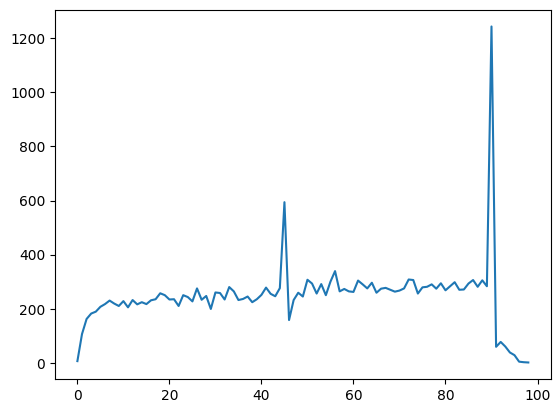

In [8]:
events_goals_time = events.filter(items=['is_goal', 'time'])
events_goals_time = events_goals_time[events_goals_time['is_goal'] == 1]
events_goals_time.value_counts()
events_goals_time = events_goals_time['time'].value_counts().rename_axis('time').reset_index(name='counts')
events_goals_time = events_goals_time.sort_values('time')

plt.plot(events_goals_time['time'], events_goals_time['counts'])
plt.show()

Analiza bramek podczas meczy domowych i na wyjeździe w czasie (wykres + interpretacja)

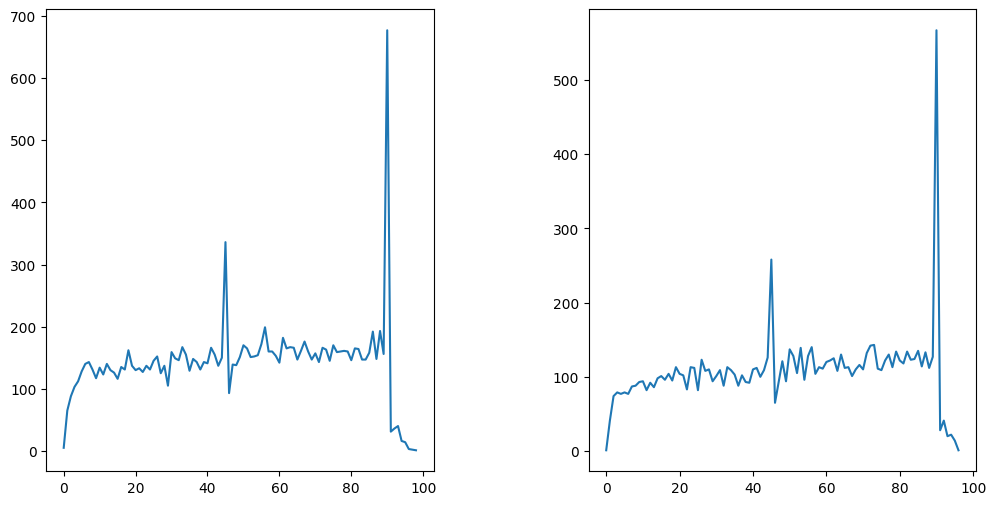

In [27]:
events_goals_time = events.filter(items=['is_goal', 'time', 'side'])
events_goals_time_home = events_goals_time[events_goals_time['is_goal'] == 1]
events_goals_time_home = events_goals_time_home[events_goals_time_home['side'] == 1]
events_goals_time_home = events_goals_time_home['time'].value_counts().rename_axis('time').reset_index(name='counts')
events_goals_time_home = events_goals_time_home.sort_values('time')

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)
plt.plot(events_goals_time_home['time'], events_goals_time_home['counts'])

events_goals_time = events.filter(items=['is_goal', 'time', 'side'])
events_goals_time_away = events_goals_time[events_goals_time['is_goal'] == 1]
events_goals_time_away = events_goals_time_away[events_goals_time_away['side'] == 2]
events_goals_time_away = events_goals_time_away['time'].value_counts().rename_axis('time').reset_index(name='counts')
events_goals_time_away = events_goals_time_away.sort_values('time')
plt.subplot(1, 2, 2)
plt.plot(events_goals_time_away['time'], events_goals_time_away['counts'])

plt.show()

Analiza w jaki sposób bramki zostały strzelone: lewa noga, prawa noga, główka ( wykres kołowy, analiza
wyniku + wykres w czasie meczu)

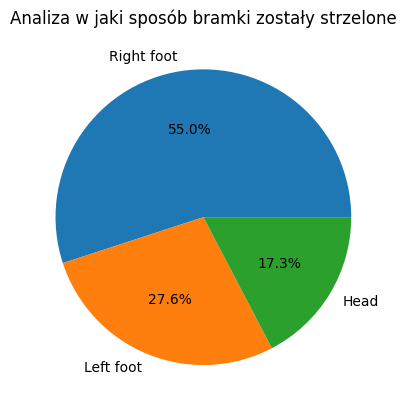

In [10]:
events_bodypart = events.filter(items=['is_goal', 'bodypart'])
events_bodypart = events_bodypart[events_bodypart['is_goal'] == 1]
labels = ['Right foot', 'Left foot', 'Head']
values = events_bodypart.value_counts()
plt.pie(values, labels=labels, autopct=lambda pct: '{:.1f}%'.format(pct))

plt.title('Analiza w jaki sposób bramki zostały strzelone')
plt.show()

Wykres lokalizacji strzelenia bramki.

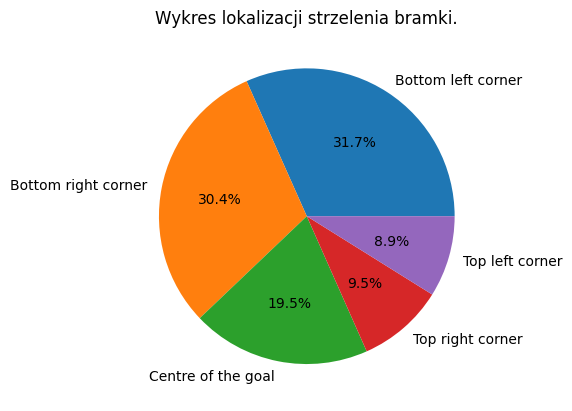

In [11]:
shot_place_dict = {1:'Bit too high',
2:'Blocked',
3:'Bottom left corner',
4:'Bottom right corner',
5:'Centre of the goal',
6:'High and wide',
7:'Hits the bar',
8:'Misses to the left',
9:'Misses to the right',
10:'Too high',
11:'Top centre of the goal',
12:'Top left corner',
13:	'Top right corner'}

events_location = events.filter(items=['is_goal', 'shot_place'])
events_location = events_location[events_location['is_goal'] == 1]
events_location.value_counts()

events_location['shot_place']=events_location['shot_place'].replace(shot_place_dict)
events_location_values = events_location.value_counts()
values= events_location_values
labels = [x[1] for x in events_location_values.index.tolist()]
plt.pie(values, labels=labels, autopct=lambda pct: '{:.1f}%'.format(pct))
plt.title('Wykres lokalizacji strzelenia bramki.')
plt.show()


Wykres asyst

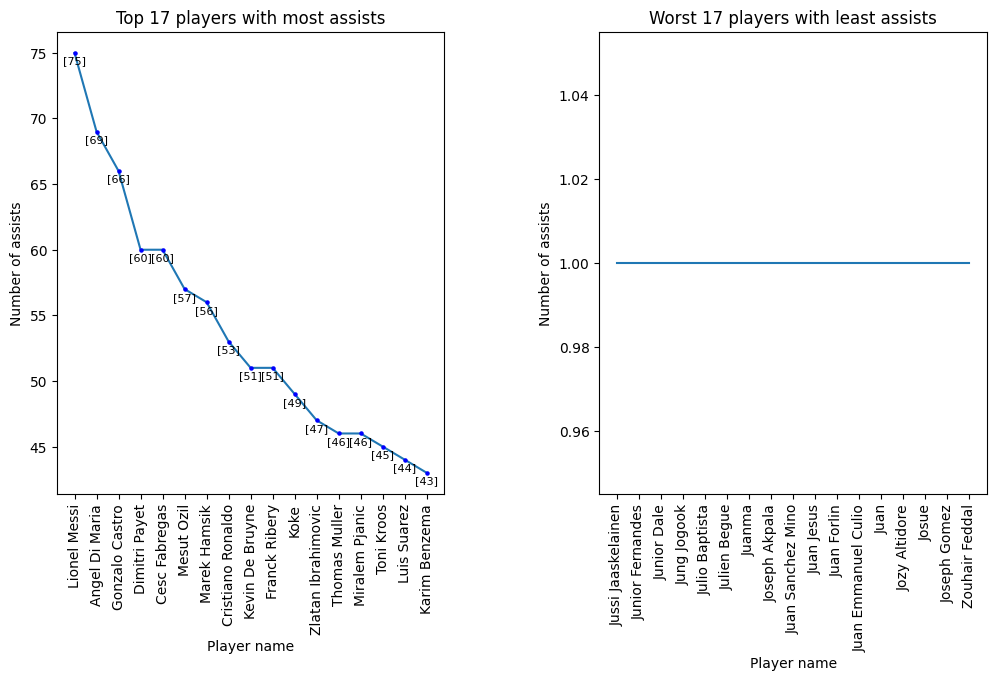

In [93]:
events_assists = events.filter(items=['is_goal', 'player2'])
events_assists = events_assists[events_assists['is_goal'] == 1]
events_assists_count=events_assists.value_counts('player2').to_frame()
events_assists_count = events_assists_count.dropna()

fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.4)

no=17 #number of players to show in graphs

plt.subplot(1, 2, 1)
plt.plot(events_assists_count.head(no))
plt.scatter(range(len(events_assists_count.head(no))), events_assists_count.head(no), color='blue', zorder=10,s=5)
plt.title(f'Top {no} players with most assists')
plt.xlabel('Player name')
plt.ylabel('Number of assists')

xticks = range(len(events_assists_count.head(no).index))
plt.xticks(xticks, [label.title() for label in events_assists_count.head(no).index], rotation=90)

for i, count in enumerate(events_assists_count.head(no).values):
    plt.text(i, count -1, str(count), ha='center', va='bottom',size=8)



plt.subplot(1, 2, 2)
plt.plot(events_assists_count.tail(no))
plt.title(f'Worst {no} players with least assists')
plt.xlabel('Player name')
plt.ylabel('Number of assists')

xticks = range(len(events_assists_count.tail(no).index))
plt.xticks(xticks, [label.title() for label in events_assists_count.tail(no).index], rotation=90)

plt.show()


Analiza zastępstw

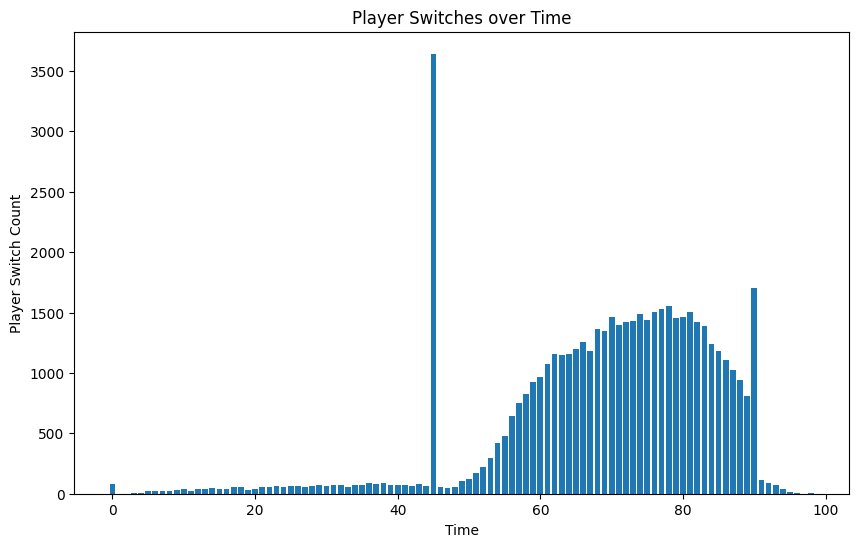

In [92]:
events_inout = events.filter(items=['player_in', 'player_out','time'])
events_inout = events_inout.dropna()
events_inout_sorted=events_inout.value_counts('time').to_frame().sort_values('count')

time_data = events_inout_sorted.index
count_data = events_inout_sorted['count']

plt.figure(figsize=(10, 6))
plt.bar(time_data, count_data)
plt.xlabel('Time')
plt.ylabel('Player Switch Count')
plt.title('Player Switches over Time')
plt.show()
